In [ ]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Download latest version
path = kagglehub.dataset_download("sagara9595/zomato-pune")

print("Path to dataset files:", path)

100%|██████████| 1.01M/1.01M [00:00<00:00, 2.07MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sagara9595/zomato-pune/versions/2


In [ ]:
# --- 1. Group Setup and Information
group_code = "A309"
student_ids = ["23073136", "23080081", "23034082", "21044571"]
github_repo_url = "https://github.com/ma24aeu/7com1079-A309"

In [ ]:
# --- 2. Dataset Loading and Initial Cleaning ---

# Load the dataset

import pandas as pd

df = pd.read_csv(path + '/zomato_pune_V002.csv')

df.head(10)

,Restaurant_Name,Web_Link,Locality,Sponsored,Ratings_out_of_5,Number of votes,Phone_number,Cuisines,Charges_for_two,payment_modes,...,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast,Catering Available,Disabled Friendly,Serves Halal,Takeaway Only,BYOB Only,spam_review
0,AB's - Absolute Barbecues,https://www.zomato.com/pune/abs-absolute-barbe...,Hinjawadi,Casual Dining,4.9,7029 votes,+91 9373112211,"Continental, North Indian, Chinese","₹1,400",Cash and Cards accepted,...,1,0,0,0,0,0,0,0,0,1539.0
1,Cafe Co2 Resto Lounge,https://www.zomato.com/pune/cafe-co2-resto-lou...,Bhugaon,"Lounge, Casual Dining",4.6,2578 votes,080 46971866,"North Indian, Chinese, Continental, Kebab, Sea...","₹1,500",Cash and Cards accepted,...,1,0,0,0,0,0,0,0,0,139.0
2,Paasha - JW Marriott Pune,https://www.zomato.com/pune/paasha-jw-marriott...,Senapati Bapat Road,Fine Dining,4.6,3291 votes,080 46971369,"North Indian, Kebab, Biryani","₹2,500","Cash,Cards and Digital Payments accepted",...,1,0,0,0,0,0,0,0,0,119.0
3,I Amsterdam,https://www.zomato.com/pune/i-amsterdam-hinjawadi,Hinjawadi,"Casual Dining, Bar",4.3,430 votes,+91 8669698666 +91 8669697666,"Asian, European, Modern Indian, Italian","₹1,400","Cash,Cards and Digital Payments accepted",...,1,0,0,0,0,0,0,0,0,8.0
4,FC Road Social,https://www.zomato.com/pune/fc-road-social-shi...,Shivaji Nagar,"Bar, Casual Dining",4.5,2138 votes,+91 9172378889 020 29805112,"North Indian, Chinese, Biryani, American, Cont...","₹1,500","Cash,Cards and Digital Payments accepted",...,0,0,0,1,0,0,0,0,0,132.0
5,Flechazo,https://www.zomato.com/pune/flechazo-wakad,Wakad,"Bar, Casual Dining",4.6,4731 votes,+91 8095311112,"Asian, Mediterranean, North Indian","₹1,400",Cash and Cards accepted,...,1,0,0,0,1,0,0,0,0,597.0
6,Barbeque Nation - Sayaji Hotel,https://www.zomato.com/pune/barbeque-nation-sa...,Wakad,Casual Dining,4.5,2999 votes,18001086060,"North Indian, Mughlai, Salad, Kebab, BBQ","₹1,700",Cash and Cards accepted,...,1,0,0,0,0,0,0,0,0,192.0
7,BeHive,https://www.zomato.com/pune/behive-hinjawadi,Hinjawadi,"Pub, Casual Dining",4.0,1437 votes,+91 9150018777 +91 9175680461,"North Indian, Chinese, Continental","₹1,400",Cash and Cards accepted,...,0,0,0,0,0,0,0,0,0,72.0
8,Kayani Bakery,https://www.zomato.com/pune/kayani-bakery-east...,East Street,Bakery,4.7,2296 votes,020 26360517,Bakery,₹150,Cash only,...,0,0,0,0,0,0,0,1,0,53.0
9,Exotica,https://www.zomato.com/pune/exotica-yerawada,Yerawada,Casual Dining,4.2,3758 votes,+91 7276307788 +91 7276305566,"North Indian, Chinese, Mediterranean, Continental","₹1,400",Cash and Cards accepted,...,1,0,0,0,0,0,0,0,0,146.0


In [ ]:

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes)

Restaurant_Name                    object
Web_Link                           object
Locality                           object
Sponsored                          object
Ratings_out_of_5                   object
Number of votes                    object
Phone_number                       object
Cuisines                           object
Charges_for_two                    object
payment_modes                      object
Rest_timming                       object
Detail_address                     object
5_star_review_percentage           object
4_star_review_percentage           object
3_star_review_percentage           object
2_star_review_percentage           object
1_star_review_percentage           object
Wine and Beer                       int64
Dance Floor                         int64
Lunch Menu                          int64
Outdoor Seating                     int64
Seaside                             int64
4/5 Star                            int64
Free Parking                      

In [ ]:

numeric_cols = ['Ratings_out_of_5', 'Number of votes', 'Charges_for_two',
                '5_star_review_percentage', '4_star_review_percentage',
                '3_star_review_percentage', '2_star_review_percentage',
                '1_star_review_percentage']

In [ ]:
for col in numeric_cols:
    # Extract numeric values using regex and convert to numeric, handling errors
    df[col] = pd.to_numeric(df[col].str.replace(r'[^\d.]', '', regex=True), errors='coerce')

# Fill NaN values (using median for robustness against outliers)
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Display first two rows of data for report (along with column types)
print("\nFirst two rows of dataset:")
print(df.head(2).to_string())

# Dataset Row Representation
print("\nEach row in the dataset represents a restaurant in Pune, including its features, reviews, and ratings.")

# --- Outlier Removal (Charges_for_two based on 4 standard deviations) ---

mean_charges = df['Charges_for_two'].mean()
std_charges = df['Charges_for_two'].std()
cutoff = 4 * std_charges

lower_limit = mean_charges - cutoff
upper_limit = mean_charges + cutoff

df = df[(df['Charges_for_two'] >= lower_limit) & (df['Charges_for_two'] <= upper_limit)]

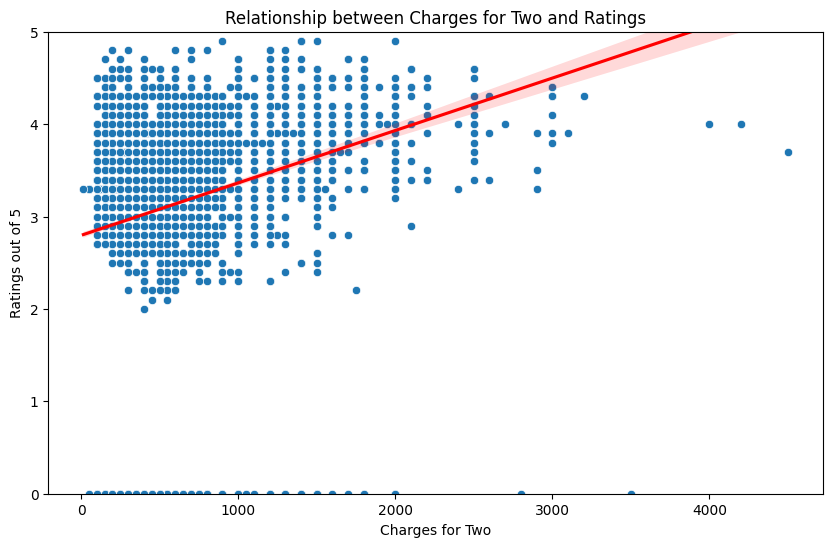

In [ ]:
# --- 4. Data Visualization ---

# Example: Scatterplot for Correlation assuming research question above
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Charges_for_two', y='Ratings_out_of_5', data=df)
sns.regplot(x='Charges_for_two', y='Ratings_out_of_5', data=df, scatter=False, color='red')  # Add a trendline
plt.title('Relationship between Charges for Two and Ratings')
plt.xlabel('Charges for Two')
plt.ylabel('Ratings out of 5')
plt.ylim(0, 5)  # Set x-axis limits to 0-5
plt.savefig('scatterplot_charges_ratings.png')
plt.show()

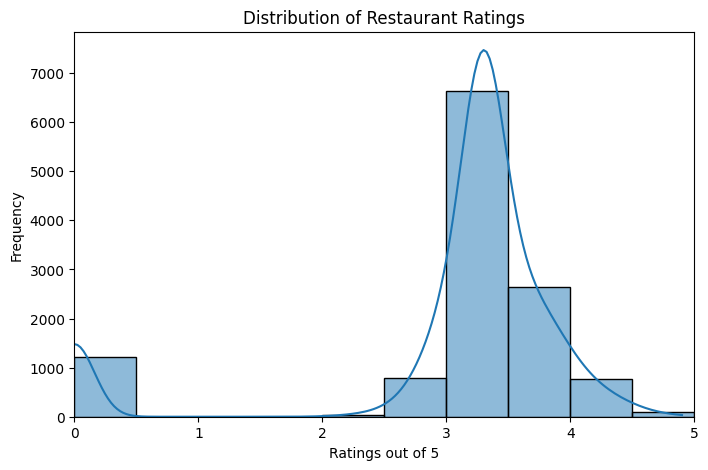

Histogram interpretation: The histogram shows a left-skewed distribution of restaurant ratings. The KDE curve helps visualize the overall shape of the distribution.


In [ ]:
# Histogram (distribution of ratings)
plt.figure(figsize=(8, 5))

# Create bins from 0 to 5.5 to cover the range (0 to 5)
bins = np.arange(0, 5.5, 0.5) # Or bins=10 for 10 bins

sns.histplot(df['Ratings_out_of_5'], kde=True, bins=bins)  # Use bins argument
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Ratings out of 5')
plt.ylabel('Frequency')
plt.xlim(0, 5)  # Set x-axis limits to 0-5
plt.savefig('histogram_ratings.png')
plt.show()

ratings = df['Ratings_out_of_5']
skewness = ratings.skew()

if skewness > 0.5:
    interpretation = "The histogram shows a right-skewed distribution of restaurant ratings."
elif skewness < -0.5:
    interpretation = "The histogram shows a left-skewed distribution of restaurant ratings."
elif kurtosis > 3 :
    interpretation = "The histogram shows a leptokurtic distribution with heavy tails"
elif kurtosis < 3:
    interpretation = "The histogram shows a platykurtic distribution with thin tails."
else:
    interpretation = "The histogram shows an approximately normal distribution of restaurant ratings."

print(f"Histogram interpretation: {interpretation} The KDE curve helps visualize the overall shape of the distribution.")

In [ ]:
# --- Calculate Correlation Coefficient ---
correlation, p_value = stats.pearsonr(df['Ratings_out_of_5'], df['Charges_for_two'])

print(f"Pearson Correlation Coefficient between Ratings and Charges: {correlation}")


Pearson Correlation Coefficient between Ratings and Charges: 0.1783178470312976


In [ ]:
# --- 5. Statistical Analysis ---

correlation, p_value = stats.pearsonr(df['Charges_for_two'], df['Ratings_out_of_5'])

print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

alpha = 0.05  # Significance level

if p_value < alpha:
    if correlation > 0.5:
        interpretation = "There is a statistically significant strong positive correlation between charges and ratings."
    elif correlation > 0.3:
        interpretation = "There is a statistically significant moderate positive correlation between charges and ratings."
    elif correlation > 0:
        interpretation = "There is a statistically significant weak positive correlation between charges and ratings."
    elif correlation < -0.5:
        interpretation = "There is a statistically significant strong negative correlation between charges and ratings."
    elif correlation < -0.3:
        interpretation = "There is a statistically significant moderate negative correlation between charges and ratings."
    else:  # -0.3 <= correlation <= 0
        interpretation = "There is a statistically significant weak negative correlation between charges and ratings."
else:
    interpretation = "There is no statistically significant correlation between charges and ratings."

print(interpretation)


Pearson Correlation Coefficient: 0.1783178470312976
P-value: 1.257340766691198e-87
There is a statistically significant weak positive correlation between charges and ratings.


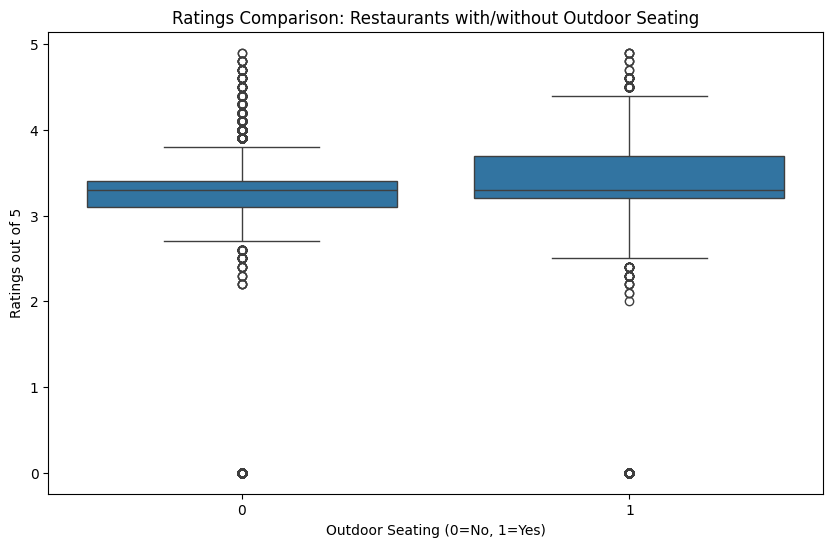

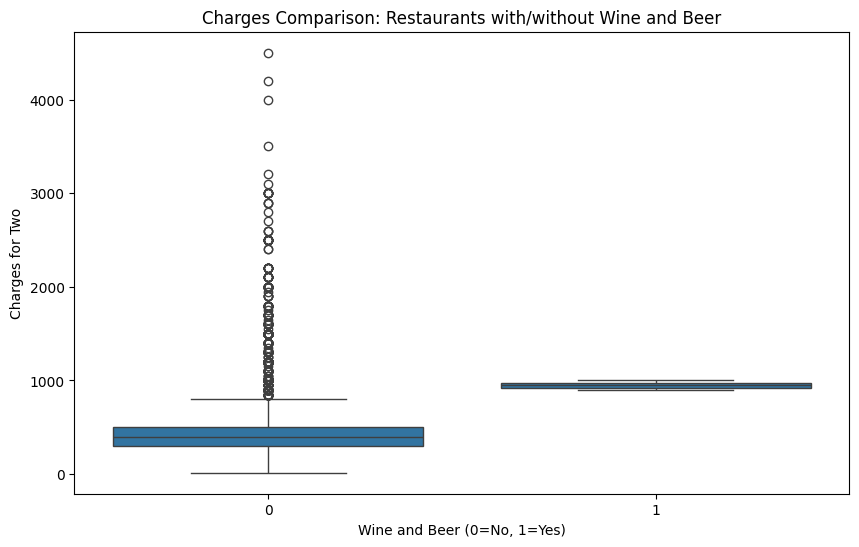

In [ ]:
# --- Additional Analysis and Visualization ---

# Comparing Ratings for Restaurants with and without 'Outdoor Seating'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outdoor Seating', y='Ratings_out_of_5', data=df)
plt.title('Ratings Comparison: Restaurants with/without Outdoor Seating')
plt.xlabel('Outdoor Seating (0=No, 1=Yes)')
plt.ylabel('Ratings out of 5')
plt.savefig('boxplot_outdoor_seating.png')
plt.show()

# Comparing Average Charges for Restaurants with and without 'Wine and Beer'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Wine and Beer', y='Charges_for_two', data=df)
plt.title('Charges Comparison: Restaurants with/without Wine and Beer')
plt.xlabel('Wine and Beer (0=No, 1=Yes)')
plt.ylabel('Charges for Two')
plt.savefig('boxplot_wine_beer.png')
plt.show()
